# Bomberle: Game Mechanics Explained

## Figure 3: State representation

`python3 main.py play --agents user_agent peaceful_agent --turn-based --make-video`

In [93]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/debug_state'

# Regex to match filenames like: "Round 01 (2025-07-24 09-46-17)_00001.png"
pattern = re.compile(r'^Round 01.*_(\d+)\.png$')

# List and sort matching files by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: int(pattern.match(f).group(1))
)

# Optionally select a subset
selected_files = files

# Optional: Resize and convert to optimized palette with dithering
target_size = (512, 512)

image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -75, -40)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    frames.append(cropped.convert('RGB').convert('P', palette=Image.ADAPTIVE, dither=Image.NONE))

# Save to GIF
output_path = 'figures/3_debug_state.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

## Figure 4: Bit representation agent

`python3 main.py play --agents tq_representator peaceful_agent rule_based_agent rule_based_agent --make-video`

In [7]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/representator'

# Regex to match filenames like: "Round 01 (2025-07-24 09-46-17)_00001.png"
pattern = re.compile(r'^Round 01.*?_(\d+)(?: copy \d+)?\.png$')


# List and sort matching files by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: int(pattern.match(f).group(1))
)
print(files)

# Optionally select a subset
selected_files = files


image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -525, -125)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    # Create new image with transparent border
    border_size = 8
    bordered = Image.new("RGBA",
                         (cropped.width + 2 * border_size, cropped.height + 2 * border_size),
                         (0, 0, 0, 0))  # fully transparent
    bordered.paste(cropped, (border_size, border_size))

    # Convert to P mode but keep transparency
    frames.append(bordered.convert("P", palette=Image.ADAPTIVE))

# Save to GIF
output_path = 'figures/4_representator.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

['Round 01 (2025-08-22 08-07-15)_00001.png', 'Round 01 (2025-08-22 08-07-15)_00002.png', 'Round 01 (2025-08-22 08-07-15)_00003.png', 'Round 01 (2025-08-22 08-07-15)_00004.png', 'Round 01 (2025-08-22 08-07-15)_00005.png', 'Round 01 (2025-08-22 08-07-15)_00006.png', 'Round 01 (2025-08-22 08-07-15)_00007.png', 'Round 01 (2025-08-22 08-07-15)_00008.png', 'Round 01 (2025-08-22 08-07-15)_00009.png', 'Round 01 (2025-08-22 08-07-15)_00010.png', 'Round 01 (2025-08-22 08-07-15)_00011.png', 'Round 01 (2025-08-22 08-07-15)_00012.png', 'Round 01 (2025-08-22 08-07-15)_00013.png', 'Round 01 (2025-08-22 08-07-15)_00014.png', 'Round 01 (2025-08-22 08-07-15)_00015.png', 'Round 01 (2025-08-22 08-07-15)_00016.png', 'Round 01 (2025-08-22 08-07-15)_00017.png', 'Round 01 (2025-08-22 08-07-15)_00018.png', 'Round 01 (2025-08-22 08-07-15)_00019.png', 'Round 01 (2025-08-22 08-07-15)_00020.png', 'Round 01 (2025-08-22 08-07-15)_00021.png', 'Round 01 (2025-08-22 08-07-15)_00022.png', 'Round 01 (2025-08-22 08-07-15)

## Figure 5: Coin Grabber

In [74]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/coin_grabber'

# Regex to match filenames like: "Round 01 (2025-07-24 09-46-17)_00001.png"
pattern = re.compile(r'^Round 01.*_(\d+)\.png$')

# List and sort matching files by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: int(pattern.match(f).group(1))
)
print(files)

# Optionally select a subset
selected_files = files


image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -525, -125)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    # Create new image with transparent border
    border_size = 8
    bordered = Image.new("RGBA",
                         (cropped.width + 2 * border_size, cropped.height + 2 * border_size),
                         (0, 0, 0, 0))  # fully transparent
    bordered.paste(cropped, (border_size, border_size))

    # Convert to P mode but keep transparency
    frames.append(bordered.convert("P", palette=Image.ADAPTIVE))

# Save to GIF
output_path = 'figures/5_coin_grabber.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

['Round 01 (2025-07-24 13-44-56)_00001.png', 'Round 01 (2025-07-24 13-44-56)_00002.png', 'Round 01 (2025-07-24 13-44-56)_00003.png', 'Round 01 (2025-07-24 13-44-56)_00004.png', 'Round 01 (2025-07-24 13-44-56)_00005.png', 'Round 01 (2025-07-24 13-44-56)_00006.png', 'Round 01 (2025-07-24 13-44-56)_00007.png', 'Round 01 (2025-07-24 13-44-56)_00008.png', 'Round 01 (2025-07-24 13-44-56)_00009.png', 'Round 01 (2025-07-24 13-44-56)_00010.png', 'Round 01 (2025-07-24 13-44-56)_00011.png', 'Round 01 (2025-07-24 13-44-56)_00012.png', 'Round 01 (2025-07-24 13-44-56)_00013.png', 'Round 01 (2025-07-24 13-44-56)_00014.png', 'Round 01 (2025-07-24 13-44-56)_00015.png', 'Round 01 (2025-07-24 13-44-56)_00016.png', 'Round 01 (2025-07-24 13-44-56)_00017.png', 'Round 01 (2025-07-24 13-44-56)_00018.png', 'Round 01 (2025-07-24 13-44-56)_00019.png', 'Round 01 (2025-07-24 13-44-56)_00020.png', 'Round 01 (2025-07-24 13-44-56)_00021.png', 'Round 01 (2025-07-24 13-44-56)_00022.png', 'Round 01 (2025-07-24 13-44-56)

## Figure 6: Crate Hero

In [73]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/crate_hero'

# Regex to match filenames like: "Round 01 (2025-07-24 09-46-17)_00001.png"
pattern = re.compile(r'^Round 01.*_(\d+)\.png$')

# List and sort matching files by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: int(pattern.match(f).group(1))
)
print(files)

# Optionally select a subset
selected_files = files


image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -525, -125)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    # Create new image with transparent border
    border_size = 8
    bordered = Image.new("RGBA",
                         (cropped.width + 2 * border_size, cropped.height + 2 * border_size),
                         (0, 0, 0, 0))  # fully transparent
    bordered.paste(cropped, (border_size, border_size))

    # Convert to P mode but keep transparency
    frames.append(bordered.convert("P", palette=Image.ADAPTIVE))

# Save to GIF
output_path = 'figures/6_crate_hero.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

['Round 01 (2025-07-24 15-51-29)_00001.png', 'Round 01 (2025-07-24 15-51-29)_00002.png', 'Round 01 (2025-07-24 15-51-29)_00003.png', 'Round 01 (2025-07-24 15-51-29)_00004.png', 'Round 01 (2025-07-24 15-51-29)_00005.png', 'Round 01 (2025-07-24 15-51-29)_00006.png', 'Round 01 (2025-07-24 15-51-29)_00007.png', 'Round 01 (2025-07-24 15-51-29)_00008.png', 'Round 01 (2025-07-24 15-51-29)_00009.png', 'Round 01 (2025-07-24 15-51-29)_00010.png', 'Round 01 (2025-07-24 15-51-29)_00011.png', 'Round 01 (2025-07-24 15-51-29)_00012.png', 'Round 01 (2025-07-24 15-51-29)_00013.png', 'Round 01 (2025-07-24 15-51-29)_00014.png', 'Round 01 (2025-07-24 15-51-29)_00015.png', 'Round 01 (2025-07-24 15-51-29)_00016.png', 'Round 01 (2025-07-24 15-51-29)_00017.png', 'Round 01 (2025-07-24 15-51-29)_00018.png', 'Round 01 (2025-07-24 15-51-29)_00019.png', 'Round 01 (2025-07-24 15-51-29)_00020.png', 'Round 01 (2025-07-24 15-51-29)_00021.png', 'Round 01 (2025-07-24 15-51-29)_00022.png', 'Round 01 (2025-07-24 15-51-29)

## Figure 7: Allstar

`python3 main.py play --agents tq_allstar peaceful_agent rule_based_agent rule_based_agent --make-video`

In [72]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/allstar'

# Updated regex to match any round number (e.g., Round 01, Round 02, etc.)
pattern = re.compile(r'^Round (\d+).*\_(\d+)\.png$')

# List and sort matching files by round number and then by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: (int(pattern.match(f).group(1)), int(pattern.match(f).group(2)))
)


# Optionally select a subset
selected_files = files


image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -525, -125)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    # Create new image with transparent border
    border_size = 8
    bordered = Image.new("RGBA",
                         (cropped.width + 2 * border_size, cropped.height + 2 * border_size),
                         (0, 0, 0, 0))  # fully transparent
    bordered.paste(cropped, (border_size, border_size))

    # Convert to P mode but keep transparency
    frames.append(bordered.convert("P", palette=Image.ADAPTIVE))

# Save to GIF
output_path = 'figures/7_allstar.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

## Figures 8 and 9

In [2]:
#!/usr/bin/env python3
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

def _npz_item(data, key, default=None):
    """Safely unwrap a 0-D object array from an npz (saved via np.array(obj, dtype=object))."""
    if key in data.files:
        return data[key].item()
    return default

def _collect_npz_files_with_chunk_indices(folder):
    """
    Return dict: chunk_idx -> path for all .npz files in folder.
    Prefer parsing from filename '*_chunk_####.npz'; fallback to reading meta.chunk_idx.
    """
    npz_files = {}
    name_pat = re.compile(r".*_chunk_(\d+)\.npz$")
    for f in os.listdir(folder):
        if not f.endswith(".npz"):
            continue
        path = os.path.join(folder, f)
        m = name_pat.match(f)
        if m:
            npz_files[int(m.group(1))] = path
            continue
        # Fallback: open and read meta.chunk_idx
        try:
            with np.load(path, allow_pickle=True) as data:
                meta = _npz_item(data, "meta", {}) or {}
                ci = meta.get("chunk_idx", None)
                if ci is not None:
                    npz_files[int(ci)] = path
        except Exception:
            # Ignore unreadable files
            pass
    return npz_files

def load_q_visits_snapshots(folder, agent=None):
    """Load q_visits from NPZ snapshots and matching evaluation JSON results."""
    # Find NPZ snapshots and eval JSONs
    eval_pat = re.compile(r"eval_chunk_(\d+)\.json$")
    eval_files = {}
    for f in os.listdir(folder):
        m = eval_pat.match(f)
        if m:
            eval_files[int(m.group(1))] = os.path.join(folder, f)

    # Only keep chunks where we have both NPZ and eval
    chunk_indices = sorted(set(eval_files.keys()))

    total_counts = []
    unique_counts = []
    avg_scores = []

    for idx in chunk_indices:
        # --- Load Evaluation JSON ---
        with open(eval_files[idx], "r") as f:
            eval_data = json.load(f)

        agent_data = None
        by_agent = eval_data.get("by_agent", {})

        if agent is None:
            # Pick the first agent name containing 'tq'
            for agent_name, stats in by_agent.items():
                if "tq" in agent_name:
                    agent_data = stats
                    break
            if agent_data is None and by_agent:
                # Fallback to any agent if none has 'tq'
                first_key = next(iter(by_agent))
                agent_data = by_agent[first_key]
        else:
            if agent not in by_agent:
                raise KeyError(f"Agent '{agent}' not found in eval for chunk {idx}. "
                               f"Available: {list(by_agent.keys())}")
            agent_data = by_agent[agent]

        # Score heuristic: prefer 'score', else coins + 5*kills
        score_total = agent_data.get("score", None)
        if score_total is None:
            score_total = agent_data.get("coins", 0) + 5 * agent_data.get("kills", 0) - 5 * agent_data.get("suicides", 0)

        rounds = max(1, int(agent_data.get("rounds", 1)))
        avg_score = score_total / rounds

        # Append metrics
        avg_scores.append(avg_score)

    return chunk_indices, avg_scores


In [28]:

c3, t3 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_mini/snapshots/dicts", agent="cnn_allstar_duel_mini")
c4, t4 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_mini/snapshots/dicts", agent="peaceful_agent")
c5, t5 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_mini/snapshots/dicts", agent="rule_based_agent_0")
c6, t6 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_mini/snapshots/dicts", agent="rule_based_agent_1")

In [54]:

c3, t3 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="cnn_allstar_duel")
c4, t4 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="peaceful_agent")
c5, t5 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="rule_based_agent")
c6, t6 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="tq_representator")

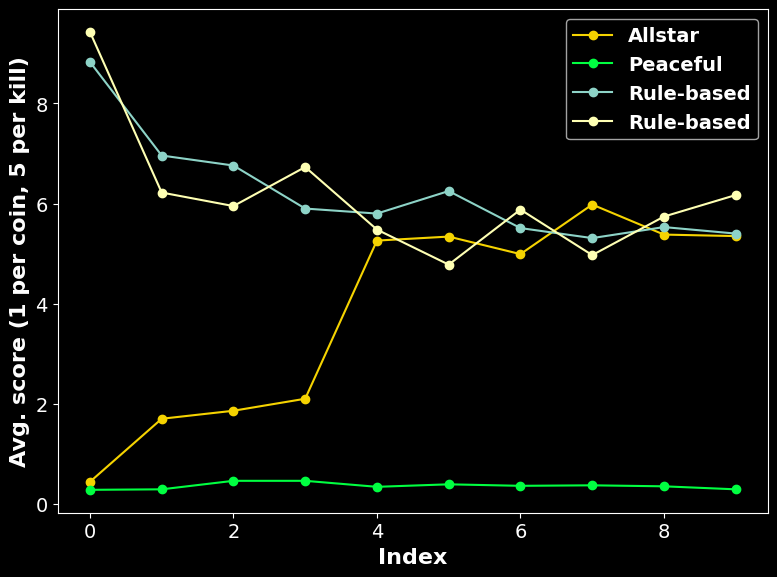

In [29]:

import matplotlib.pyplot as plt
import numpy as np

# Use dark background
plt.style.use('dark_background')

# Glowing line style setup
linewidths     = np.logspace(-5, 5, 20, base=2)
transparencies = np.linspace(1, 0, 20)

# Neon color palette
neon_colors = [
    '#08F7FE',  # Coingrabber - neon cyan
    '#FE53BB',  # Cratehero - neon pink
    '#F5D300',  # Allstar - neon yellow
    '#00FF41',  # Rule-based agent - neon green (only for second plot)
]


plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],  # Or any available sans-serif font
    "font.size": 14,                     # Base font size
    "axes.labelweight": "bold",         # Make axis labels bold
    "axes.titlesize": 16,               # Title font size if used
    "axes.labelsize": 16,               # Axis label size
    "legend.fontsize": 14,              # Legend font size
    "legend.title_fontsize": 14,        # Legend title size (if used)
})

# ----------- Plot 1: Average evaluation score ------------
plt.figure(figsize=(8, 6))

# Final visible lines with labels
plt.plot(c3, t3, label="Allstar", c=neon_colors[2], marker='o')
plt.plot(c4, t4, label="Peaceful", c=neon_colors[3], marker='o')
plt.plot(c5, t5, label="Rule-based", marker='o')
plt.plot(c6, t6, label="Rule-based", marker='o')

plt.xlabel("Index")
plt.ylabel("Avg. score (1 per coin, 5 per kill)")
plt.legend(prop=dict(weight='bold'))
plt.tight_layout()
plt.show()



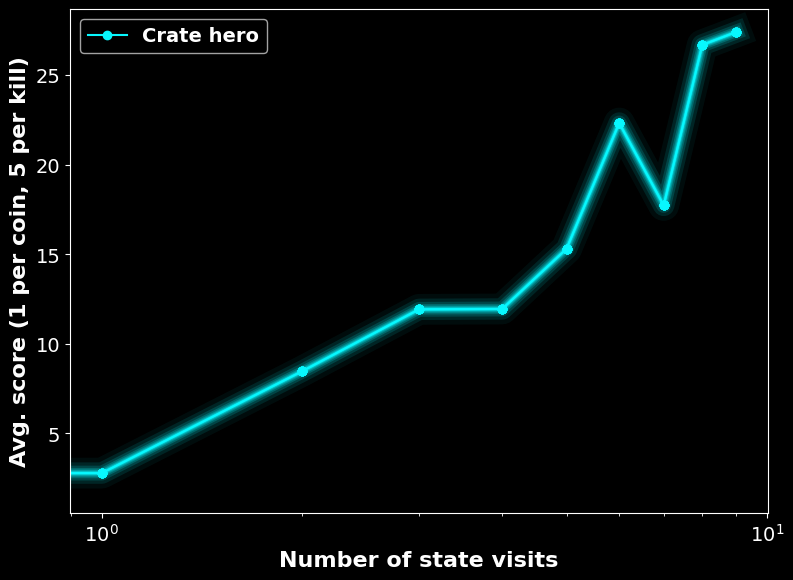

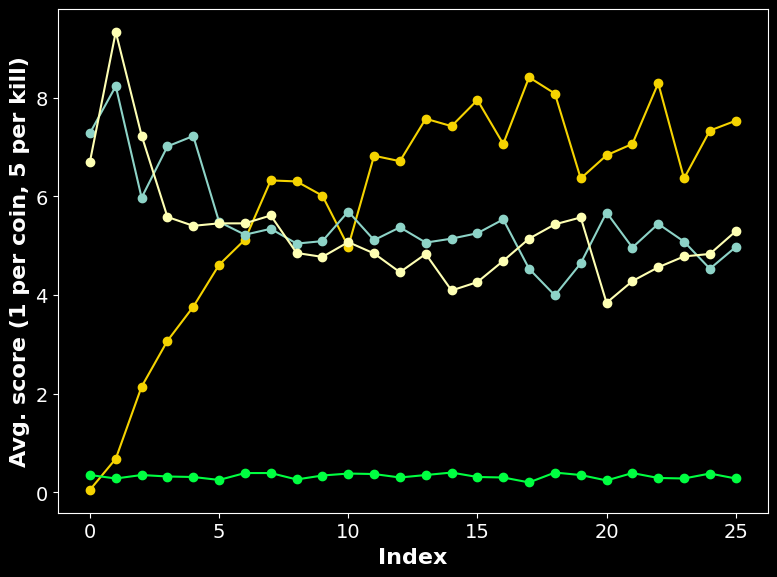

In [ ]:
import json
fn1 = "agent_code/cnn_allstar_duel/snapshots/experiment_29_training_log.json"
fn2 = "agent_code/cnn_allstar_duel/snapshots/experiment_04_training_log.json"


# Open and load JSON file
with open(fn1, 'r') as file:
    data  = json.load(file)

# Open and load JSON file
with open(fn2, 'r') as file:
    data2 = json.load(file)
# Now `data` is a Python dictionary (or list, depending on the JSON structure)
for v in data2:
    print(v)

{'training_round': 0, 'gradient_step': 0, 'loss': 0.023157520219683647}
{'training_round': 0, 'gradient_step': 1, 'loss': 0.02133096009492874}
{'training_round': 0, 'gradient_step': 2, 'loss': 0.01794973388314247}
{'training_round': 0, 'gradient_step': 3, 'loss': 0.013799733482301235}
{'training_round': 1, 'gradient_step': 0, 'loss': 0.012875359505414963}
{'training_round': 1, 'gradient_step': 1, 'loss': 0.009683936834335327}
{'training_round': 1, 'gradient_step': 2, 'loss': 0.014350119046866894}
{'training_round': 1, 'gradient_step': 3, 'loss': 0.00831863097846508}
{'training_round': 2, 'gradient_step': 0, 'loss': 0.013149388134479523}
{'training_round': 2, 'gradient_step': 1, 'loss': 0.02256949618458748}
{'training_round': 2, 'gradient_step': 2, 'loss': 0.007296192459762096}
{'training_round': 2, 'gradient_step': 3, 'loss': 0.011028802022337914}
{'training_round': 3, 'gradient_step': 0, 'loss': 0.013676377944648266}
{'training_round': 3, 'gradient_step': 1, 'loss': 0.0076568434014916

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


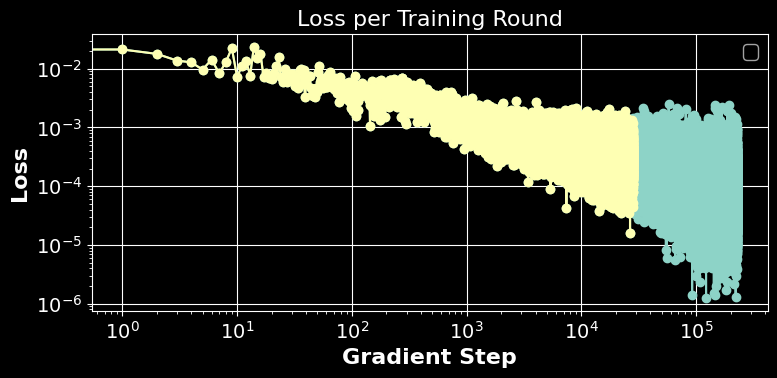

In [20]:
from matplotlib import pyplot as plt

# Option 1: Plot loss over global gradient step
x1 = list(range(len(data)))
y1 = [entry['loss'] for entry in data]

x2 = list(range(len(data2)))
y2 = [entry['loss'] for entry in data2]
plt.figure(figsize=(8, 4))
plt.plot(x1, y1, marker='o')
plt.plot(x2, y2, marker='o')
plt.title('Loss per Training Round')
plt.xlabel('Gradient Step')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Total number of states:

Which agent plays best?

`python3 main.py play --agents cnn_allstar_duel peaceful_agent rule_based_agent tq_representator --n-rounds 1000 --save-stats --no-gui`

In [1]:
import json
import pandas as pd

# --- Load Evaluation JSON ---
with open("results/2025-09-11 13-14-00.json", "r") as f:
    eval_data = json.load(f)


# Extract agent names and scores
data = []

# Get the list of all categories (keys from the first agent's scores)
all_categories = list(next(iter(eval_data["by_agent"].values())).keys())

# Iterate through the agents and ensure all attributes are present
for agent_name, scores in eval_data["by_agent"].items():
    row = [agent_name]
    for category in all_categories:
        # Add the score if available, otherwise add 0 for missing categories
        row.append(f"{scores.get(category, 0) / 1000:.2g}")
    data.append(row)

# Create a DataFrame
df = pd.DataFrame(data, columns=["Agent"] + all_categories)

# Display the DataFrame vertically (transposed)
df.T  # This will transpose the table in Jupyter


,0,1,2,3
Agent,cnn_allstar_duel,peaceful_agent,rule_based_agent,tq_representator
bombs,25,0,6.7,15
coins,3,0.33,2,3.4
crates,5.5,0,6.5,8.6
invalid,2,19,3.7,3.6
kills,0.7,0,0.38,0.56
moves,1.5e+02,15,1e+02,1.8e+02
rounds,1,1,1,1
score,6.5,0.33,3.9,6.2
steps,2.8e+02,34,1.2e+02,2e+02


In [42]:
import json
import pandas as pd

# --- Load Evaluation JSON ---
with open("results/2025-09-12 00-01-59.json", "r") as f:
    eval_data = json.load(f)


# Extract agent names and scores
data = []

# Get the list of all categories (keys from the first agent's scores)
all_categories = list(next(iter(eval_data["by_agent"].values())).keys())

# Iterate through the agents and ensure all attributes are present
for agent_name, scores in eval_data["by_agent"].items():
    row = [agent_name]
    for category in all_categories:
        # Add the score if available, otherwise add 0 for missing categories
        row.append(f"{scores.get(category, 0) / 1000:.2g}")
    data.append(row)

# Create a DataFrame
df = pd.DataFrame(data, columns=["Agent"] + all_categories)

# Display the DataFrame vertically (transposed)
df.T  # This will transpose the table in Jupyter


,0,1,2,3
Agent,cnn_allstar_duel_mini,peaceful_agent,rule_based_agent,tq_representator
bombs,25,0,7.4,12
coins,2.5,0.32,2,3.9
crates,4.7,0,6.5,9.4
invalid,1.4,20,4,3.2
kills,0.72,0,0.4,0.61
moves,1.6e+02,15,81,1.1e+02
rounds,1,1,1,1
score,6.1,0.32,4,7
steps,2e+02,35,96,1.3e+02


In [28]:
# Start Markdown table (first row with agents)
markdown_output = "| Category | " + " | ".join(eval_data["by_agent"].keys()) + " |\n"
markdown_output += "|----------|-" + "|".join(["-" * len(agent) for agent in eval_data["by_agent"].keys()]) + "|\n"

# Add rows for each category (Score 1, Score 2, etc.)
categories = next(iter(eval_data["by_agent"].values())).keys()
for category in categories:
    markdown_output += f"| {category} | " + " | ".join([
        f"{scores.get(category, 0) / 1000:.2g}" for scores in eval_data["by_agent"].values()
    ]) + " |\n"

print(markdown_output)

| Category | tq_allstar | peaceful_agent | rule_based_agent | tq_representator |
|----------|-----------|--------------|----------------|----------------|
| bombs | 18 | 0 | 8 | 19 |
| coins | 3.5 | 0.33 | 2.1 | 3 |
| crates | 6.5 | 0 | 6.3 | 8.1 |
| invalid | 2.1 | 18 | 4.7 | 3.4 |
| kills | 0.57 | 0 | 0.48 | 0.62 |
| moves | 1.3e+02 | 14 | 69 | 1.3e+02 |
| rounds | 1 | 1 | 1 | 1 |
| score | 6.3 | 0.33 | 4.5 | 6.1 |
| steps | 1.5e+02 | 33 | 84 | 1.5e+02 |
| suicides | 0.61 | 0 | 0.34 | 0.52 |
| time | 0.08 | 0.00099 | 0.04 | 0.061 |



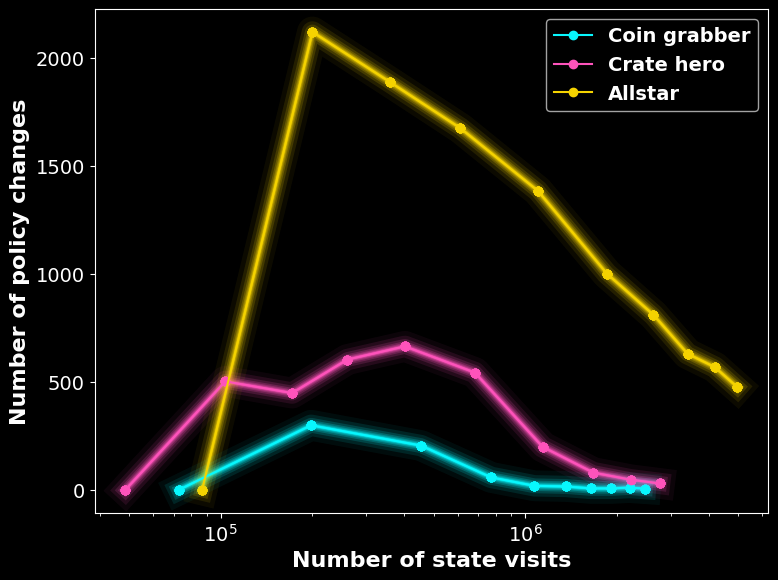

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

folders = ["agent_code/tq_coingrabber/dicts", "agent_code/tq_cratehero/dicts", "agent_code/tq_allstar/dicts"]
policy_changes_all_scenarios = []  # List to hold policy changes for all scenarios
# Loop through each scenario
for folder_idx, folder in enumerate(folders):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".npz")])

    policy_changes = []  # List to hold policy changes for the current scenario
    previous_q_argmax = None  # Stores the previous policy (argmax Q-values)

    # Loop through all files in the current scenario's folder
    for f in files:
        path = os.path.join(folder, f)
        with np.load(path, allow_pickle=True) as data:
            q = data["q"].item()  # Q-values for the current step

        # Compute the argmax of Q-values (current policy)
        current_q_argmax = {state: np.argmax(q_values) for state, q_values in q.items() if len(q_values) > 0}

        # Count how many states changed their policy
        if previous_q_argmax is None:
            policy_changes.append(0)  # No previous policy to compare with
        else:
            change_count = 0
            all_states = set(current_q_argmax.keys()).union(previous_q_argmax.keys())
            for state in all_states:
                prev = previous_q_argmax.get(state, -1)
                curr = current_q_argmax.get(state, -1)
                if prev != curr:
                    change_count += 1
            policy_changes.append(change_count)  # Record the number of policy changes

        # Update previous policy for the next comparison
        previous_q_argmax = current_q_argmax

    # Append the policy changes and state visits for the current scenario
    policy_changes_all_scenarios.append(policy_changes)

c1, c2, c3 = policy_changes_all_scenarios  # Policy changes for the 3 scenarios


# Use dark background
plt.style.use('dark_background')

# Glowing line style setup
linewidths     = np.logspace(-5, 5, 20, base=2)
transparencies = np.linspace(1, 0, 20)

# Neon color palette
neon_colors = [
    '#08F7FE',  # Coingrabber - neon cyan
    '#FE53BB',  # Cratehero - neon pink
    '#F5D300',  # Allstar - neon yellow
    '#00FF41',  # Rule-based agent - neon green (only for second plot)
]


plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],  # Or any available sans-serif font
    "font.size": 14,                     # Base font size
    "axes.labelweight": "bold",         # Make axis labels bold
    "axes.titlesize": 16,               # Title font size if used
    "axes.labelsize": 16,               # Axis label size
    "legend.fontsize": 14,              # Legend font size
    "legend.title_fontsize": 14,        # Legend title size (if used)
})


# ----------- Plot 1: Average evaluation score ------------
plt.figure(figsize=(8, 6))

# Apply glow for each series
for lw, alpha in zip(linewidths, transparencies):
    plt.plot(t1, c1, lw=lw, alpha=alpha, c=neon_colors[0], marker='o')
    plt.plot(t2, c2, lw=lw, alpha=alpha, c=neon_colors[1], marker='o')
    plt.plot(t3, c3, lw=lw, alpha=alpha, c=neon_colors[2], marker='o')

# Final visible lines with labels
plt.plot(t1, c1, label="Coin grabber", c=neon_colors[0], marker='o')
plt.plot(t2, c2, label="Crate hero", c=neon_colors[1], marker='o')
plt.plot(t3, c3, label="Allstar", c=neon_colors[2], marker='o')

plt.xlabel("Number of state visits")
plt.ylabel("Number of policy changes")
plt.legend(prop=dict(weight='bold'))
plt.tight_layout()
plt.xscale("log")
plt.savefig("figures/10_policy_changes.png")
plt.show()



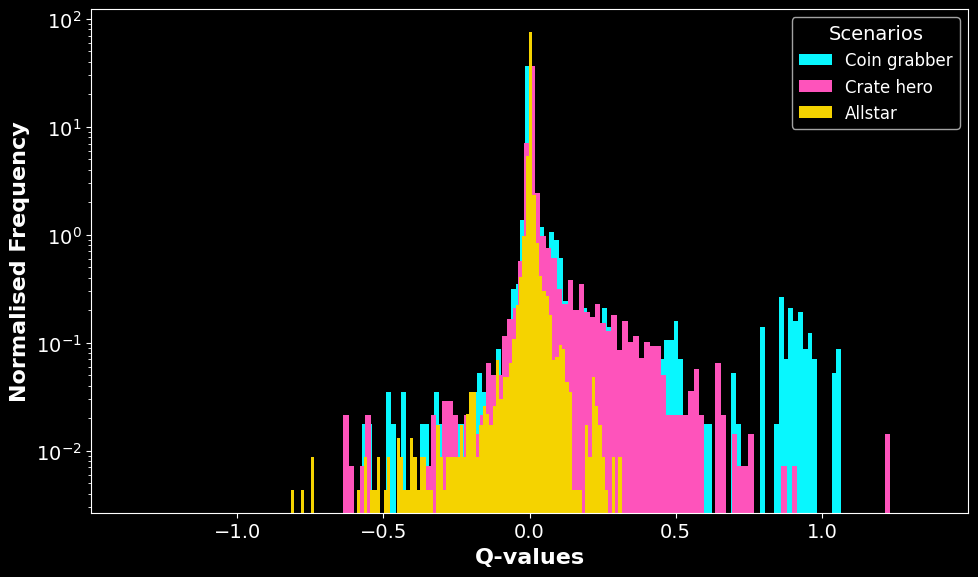

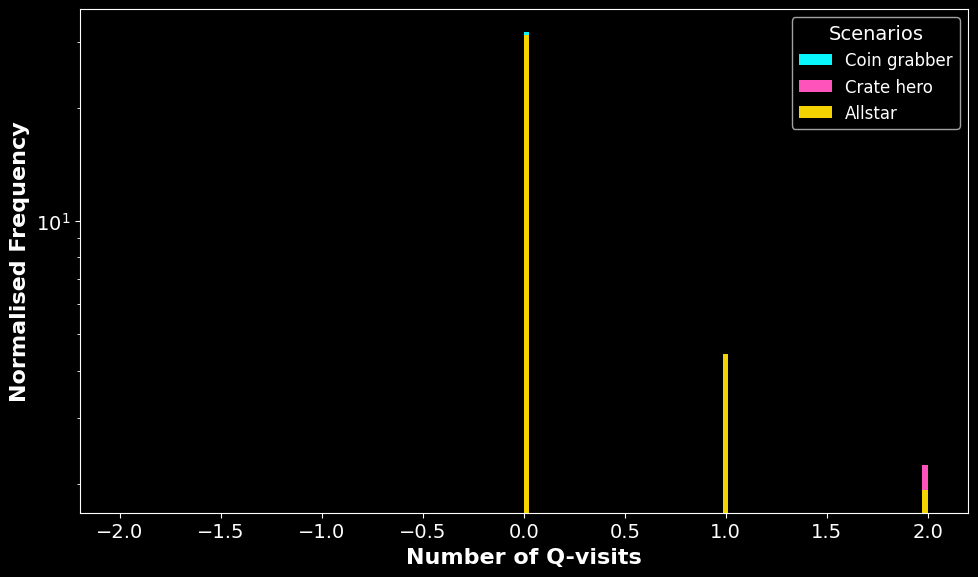

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define folders and scenario names
folders = ["agent_code/tq_coingrabber/dicts", "agent_code/tq_cratehero/dicts", "agent_code/tq_allstar/dicts"]
scenario_names = ["Coin grabber", "Crate hero", "Allstar"]


# Use dark background
plt.style.use('dark_background')

# Neon color palette
colors = [
    '#08F7FE',  # Coingrabber - neon cyan
    '#FE53BB',  # Cratehero - neon pink
    '#F5D300',  # Allstar - neon yellow
    '#00FF41',  # Rule-based agent - neon green (only for second plot)
]


plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],  # Or any available sans-serif font
    "font.size": 14,                     # Base font size
    "axes.labelweight": "bold",         # Make axis labels bold
    "axes.titlesize": 16,               # Title font size if used
    "axes.labelsize": 16,               # Axis label size
    "legend.fontsize": 14,              # Legend font size
    "legend.title_fontsize": 14,        # Legend title size (if used)
})


# Prepare list for storing Q-distributions
q_distributions_all_scenarios = []
qv_distributions_all_scenarios = []
# Loop through each folder (each scenario)
for folder_idx, folder in enumerate(folders):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".npz")])

    q_distributions = []  # To store Q-values distributions for each timestep
    qv_distributions = []  # To store Qv- values distributions for each timestep
    last_q_values = None  # To store the Q-values from the last timestep
    last_qv_values = None  # To store the Q-values from the last timestep

    for f in files:
        path = os.path.join(folder, f)
        with np.load(path, allow_pickle=True) as data:
            q = data["q"].item()
            qv = data["q_visits"].item()

        # Store Q-values from the last timestep
        if len(q) > 0:
            last_q_values = np.concatenate([np.ravel(values) for values in q.values()])

            last_qv_values = np.concatenate([np.ravel(values) for values in qv.values()])

    # Append the last Q-values distribution for this scenario
    q_distributions_all_scenarios.append(last_q_values)
    qv_distributions_all_scenarios.append(last_qv_values)

# Plotting the normalized Q-value distributions for the last timestep for all scenarios in a single plot
plt.figure(figsize=(10, 6))

for idx, q_distribution in enumerate(q_distributions_all_scenarios):
    q_distribution = q_distribution[~np.isclose(q_distribution, 0)]

    # Final visible line with label
    plt.hist(q_distribution, bins=100, alpha=1.0, color=colors[idx], label=f"{scenario_names[idx]}",
             linewidth=3, density=True)


# Add final visible lines with labels
plt.legend(title="Scenarios", loc="upper right", fontsize=12)
plt.xlabel("Q-values")
plt.ylabel("Normalised Frequency")
#plt.xscale('symlog')
plt.xlim(-1.5, 1.5)
plt.xticks([-1, -0.5,  0, 0.5, 1])
plt.yscale('log')
# Show the plot
plt.tight_layout()
plt.savefig("figures/11_q_distribution.png")
plt.show()



# Plotting the normalized Q-value distributions for the last timestep for all scenarios in a single plot
plt.figure(figsize=(10, 6))

for idx, q_distribution in enumerate(qv_distributions_all_scenarios):

    # Final visible line with label
    plt.hist(q_distribution, bins=150, range=[-2, 2], alpha=1.0, color=colors[idx], label=f"{scenario_names[idx]}",
             linewidth=3, density=True)


# Add final visible lines with labels
plt.legend(title="Scenarios", loc="upper right", fontsize=12)
plt.xlabel("Number of Q-visits")
plt.ylabel("Normalised Frequency")
plt.yscale('log')
# Show the plot
plt.tight_layout()
plt.savefig("figures/12_q_visit_distribution.png")
plt.show()


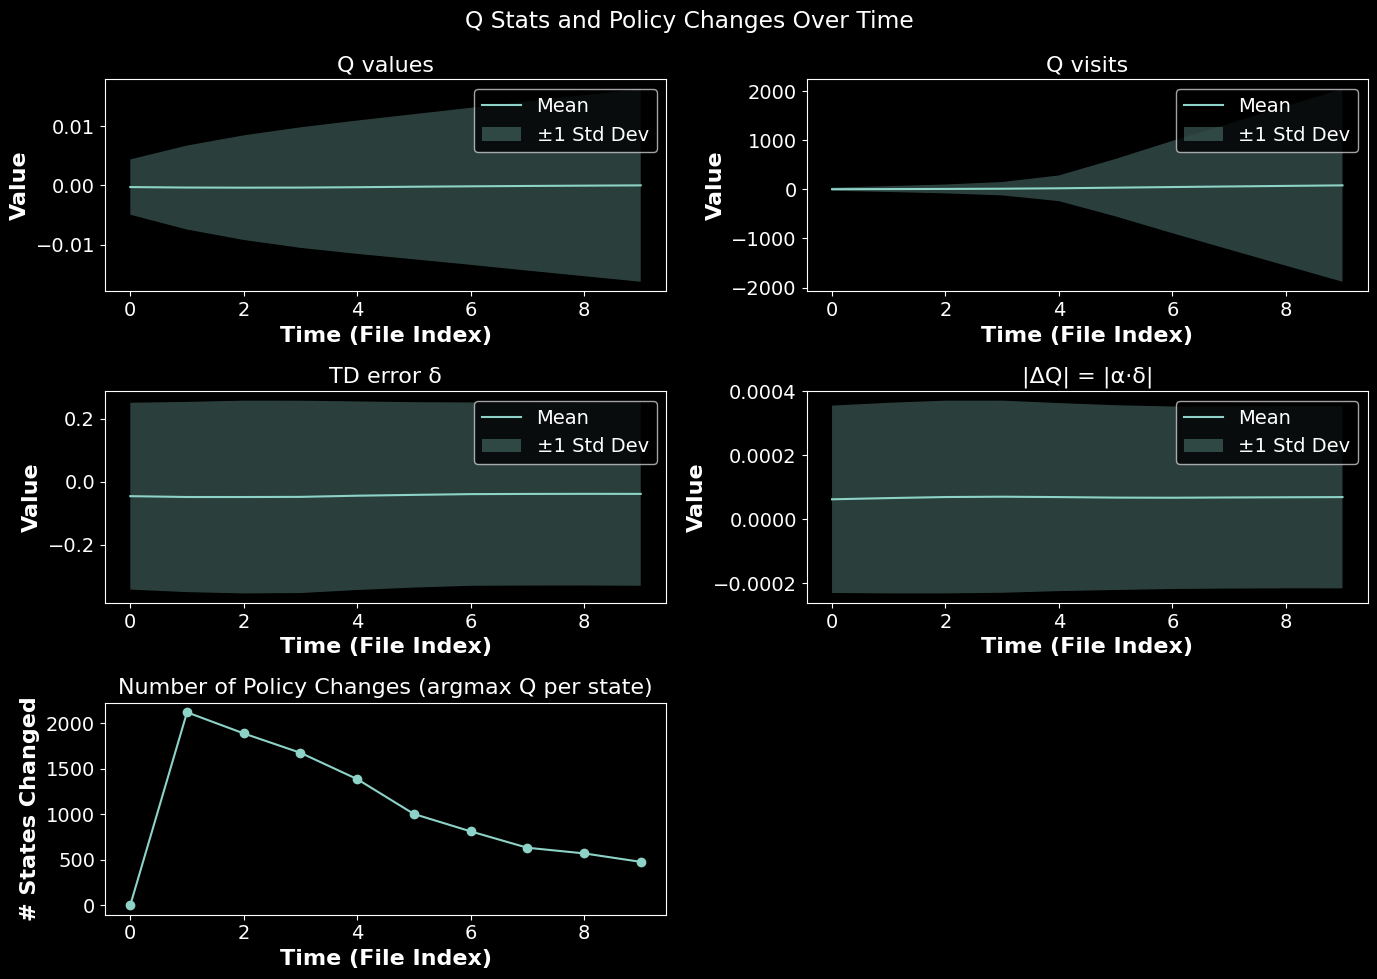

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_q_stats_and_policy_changes(folder):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".npz")])

    timestamps = []
    stats = {
        "q": {"mean": [], "std": []},
        "q_visits": {"mean": [], "std": []},
        "q_td_error": {"mean": [], "std": []},
        "q_update_mag": {"mean": [], "std": []},
    }
    policy_changes = []  # Number of changed states between steps

    previous_q_argmax = None  # Stores previous policy

    for f in files:
        path = os.path.join(folder, f)
        with np.load(path, allow_pickle=True) as data:
            q            = data["q"].item()
            q_visits     = data["q_visits"].item()
            q_td_error   = data["q_td_error"].item()
            q_update_mag = data["q_update_mag"].item()

        timestamps.append(f)

        # Compute statistics
        def flatten(d):
            return np.concatenate([np.ravel(v) for v in d.values()]) if d else np.array([])

        for key, values in zip(
            ["q", "q_visits", "q_td_error", "q_update_mag"],
            [q, q_visits, q_td_error, q_update_mag]
        ):
            flat = flatten(values)
            if len(flat) > 0:
                stats[key]["mean"].append(np.mean(flat))
                stats[key]["std"].append(np.std(flat))
            else:
                stats[key]["mean"].append(np.nan)
                stats[key]["std"].append(np.nan)

        # Compute policy (argmax Q-values)
        current_q_argmax = {}
        for state, q_values in q.items():
            if len(q_values) > 0:
                current_q_argmax[state] = np.argmax(q_values)

        # Count how many states changed policy
        if previous_q_argmax is None:
            policy_changes.append(0)
        else:
            change_count = 0
            all_states = set(current_q_argmax.keys()).union(previous_q_argmax.keys())
            for state in all_states:
                prev = previous_q_argmax.get(state, -1)
                curr = current_q_argmax.get(state, -1)
                if prev != curr:
                    change_count += 1
            policy_changes.append(change_count)

        previous_q_argmax = current_q_argmax

    # Plotting stats
    fig, axs = plt.subplots(3, 2, figsize=(14, 10))
    fig.suptitle("Q Stats and Policy Changes Over Time")

    keys = ["q", "q_visits", "q_td_error", "q_update_mag"]
    titles = ["Q values", "Q visits", "TD error δ", "|ΔQ| = |α·δ|"]

    for ax, key, title in zip(axs.flat[:4], keys, titles):
        means = stats[key]["mean"]
        stds = stats[key]["std"]
        x = range(len(timestamps))

        ax.plot(x, means, label='Mean')
        ax.fill_between(x, np.array(means) - np.array(stds), np.array(means) + np.array(stds),
                        alpha=0.3, label='±1 Std Dev')
        ax.set_title(title)
        ax.set_xlabel("Time (File Index)")
        ax.set_ylabel("Value")
        ax.legend()

    # Plot policy changes
    axs[2, 0].plot(range(len(policy_changes)), policy_changes, marker='o')
    axs[2, 0].set_title("Number of Policy Changes (argmax Q per state)")
    axs[2, 0].set_xlabel("Time (File Index)")
    axs[2, 0].set_ylabel("# States Changed")

    # Hide unused subplot
    axs[2, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage:
plot_q_stats_and_policy_changes("agent_code/tq_allstar/dicts")


In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from q_helpers import describe_state, ACTS
top_n = 3
def print_highest_td_error_states(folder):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".npz")])

    timestamps = []
    stats = {
        "q": {"mean": [], "std": []},
        "q_visits": {"mean": [], "std": []},
        "q_td_error": {"mean": [], "std": []},
        "q_update_mag": {"mean": [], "std": []},
    }
    policy_changes = []  # Number of changed states between steps

    previous_q_argmax = None  # Stores previous policy

    for f in files:
        path = os.path.join(folder, f)
        with np.load(path, allow_pickle=True) as data:
            q_td_error = data["q_td_error"].item()

            # Flatten into (abs_td_error, state, action) triples
            all_errors = []
            for state, actions in q_td_error.items():
                for action, td_err in enumerate(actions):
                    all_errors.append((abs(td_err), state, action))

            if not all_errors:
                print(f"{f}: no TD errors recorded")
                continue

            # Sort by error magnitude, descending
            all_errors_sorted = sorted(all_errors, key=lambda x: x[0], reverse=True)

            # Pick top N
            top = all_errors_sorted[:top_n]

            print(f"\nFile: {f}")
            for rank, (val, state, action) in enumerate(top, start=1):
                print(f" {rank}. TD error={val:.4f}, state={state}, action={ACTS[action]}")
                print(describe_state(state))



# Example usage:
print_highest_td_error_states("agent_code/tq_allstar/dicts")



File: q_table_chunk_0001.npz
 1. TD error=1.9214, state=52289, action=DOWN
State : 001100110001000001
Goto  : COIN (UP)
Wait  : DANGER
Bomb  : DANGER
Up    : DANGER
Right : WALL
Down  : EMPTY
Left  : WALL
 2. TD error=1.9200, state=49268, action=WAIT
State : 001100000001110100
Goto  : COIN (UP)
Wait  : DANGER
Bomb  : DANGER
Up    : EMPTY
Right : WALL
Down  : DANGER
Left  : ENEMY
 3. TD error=1.9200, state=45134, action=WAIT
State : 001011000001001110
Goto  : CRATE (LEFT)
Wait  : DANGER
Bomb  : DANGER
Up    : EMPTY
Right : WALL
Down  : WALL
Left  : DANGER

File: q_table_chunk_0002.npz
 1. TD error=1.9270, state=55817, action=RIGHT
State : 001101101000001001
Goto  : COIN (RIGHT)
Wait  : DANGER
Bomb  : DANGER
Up    : BOMB
Right : EMPTY
Down  : WALL
Left  : WALL
 2. TD error=1.9200, state=60457, action=RIGHT
State : 001110110000101001
Goto  : COIN (DOWN)
Wait  : DANGER
Bomb  : DANGER
Up    : DANGER
Right : EMPTY
Down  : BOMB
Left  : WALL
 3. TD error=1.9200, state=49268, action=WAIT
State

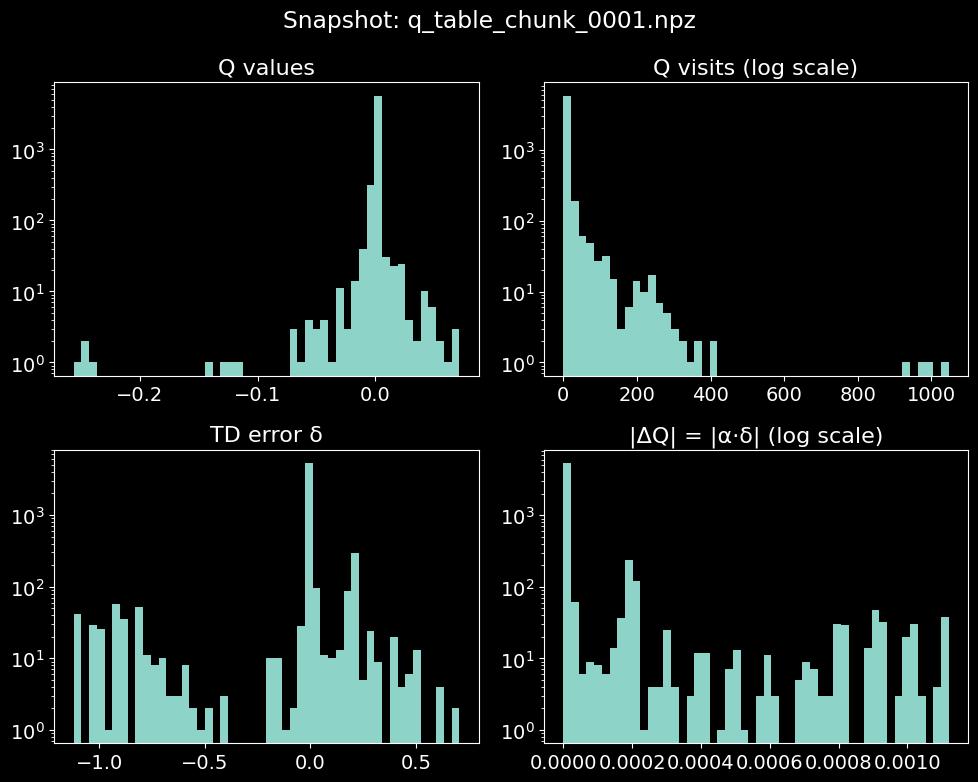

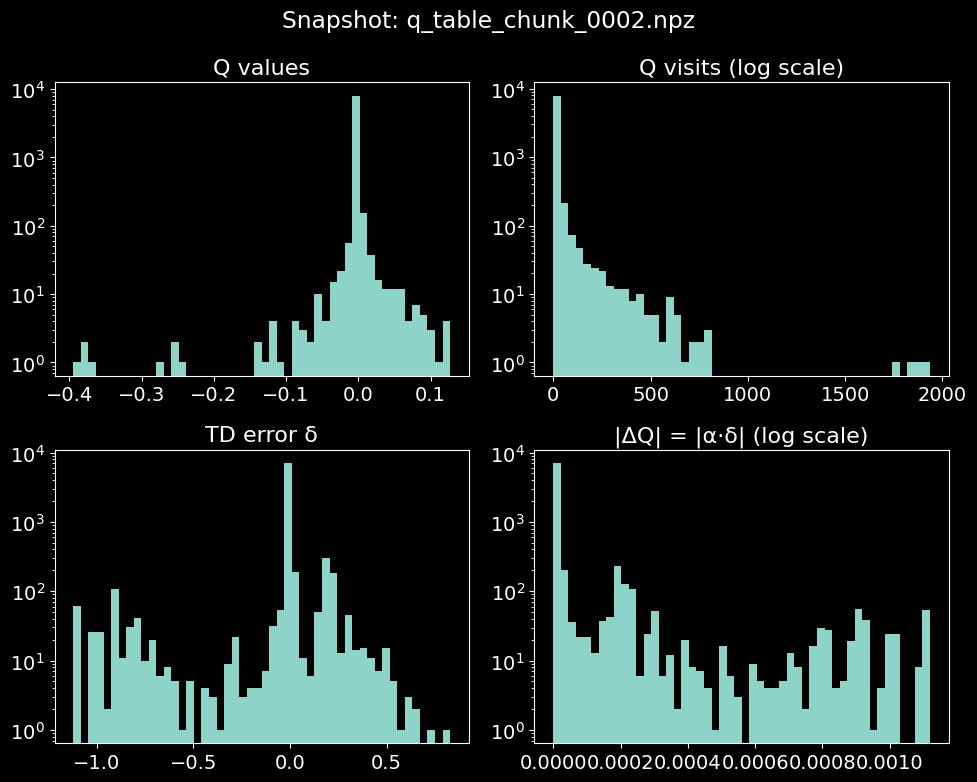

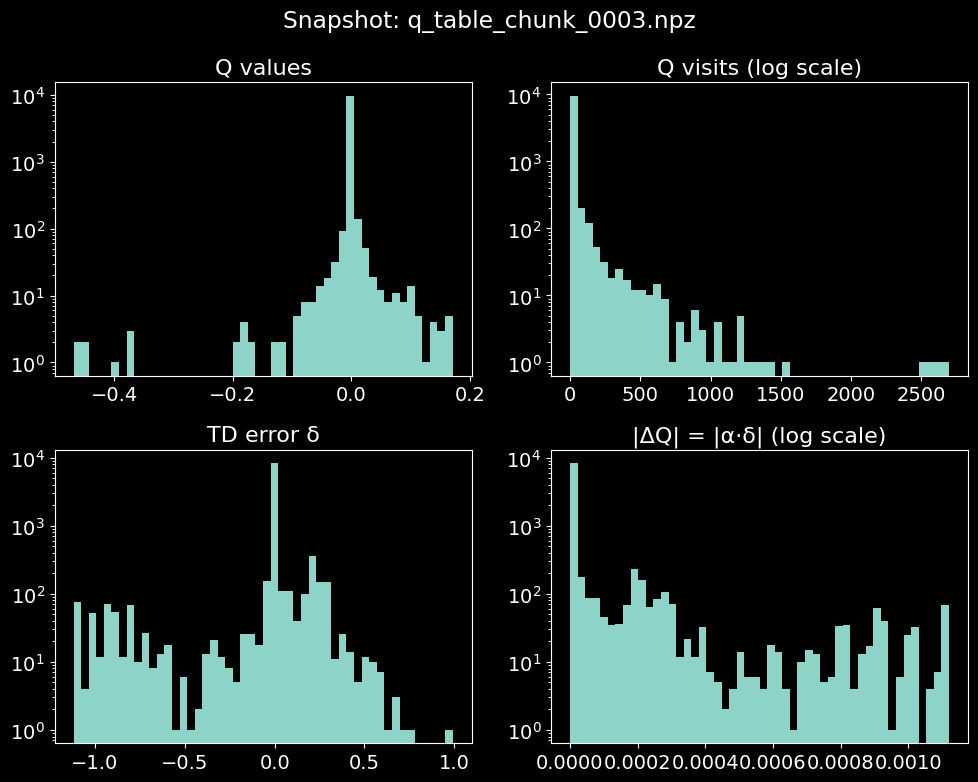

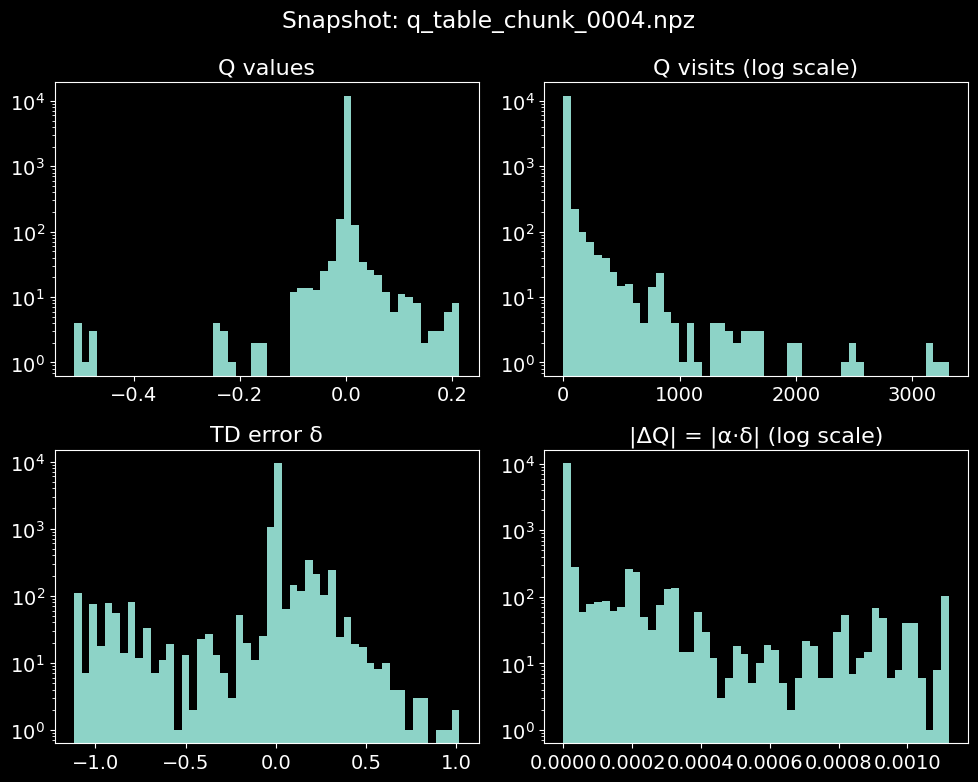

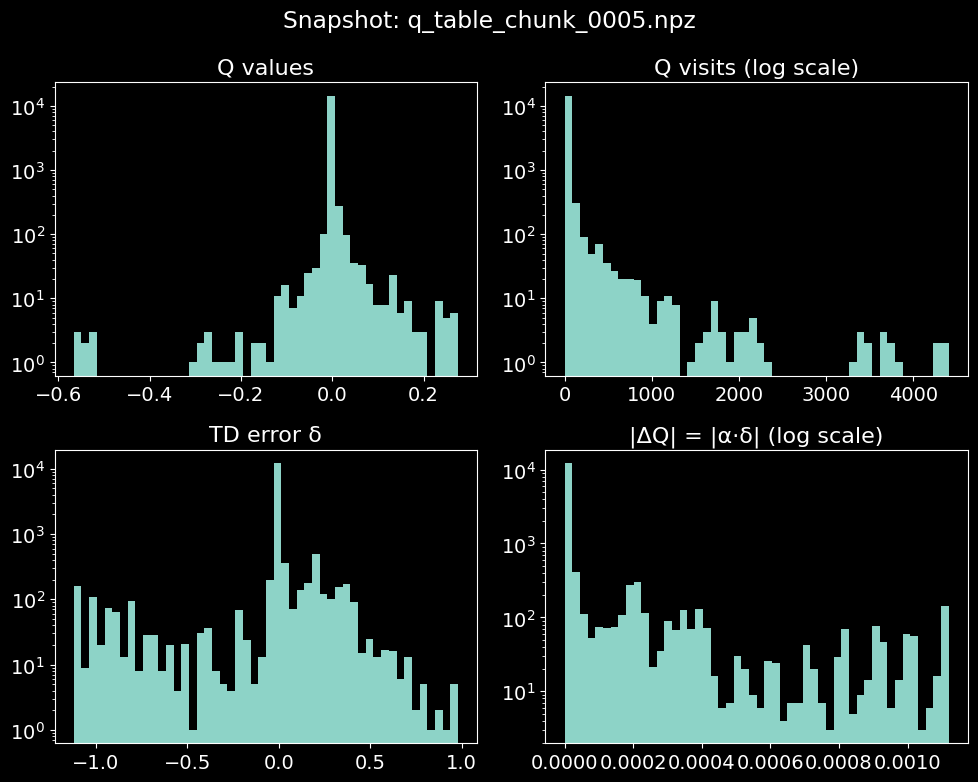

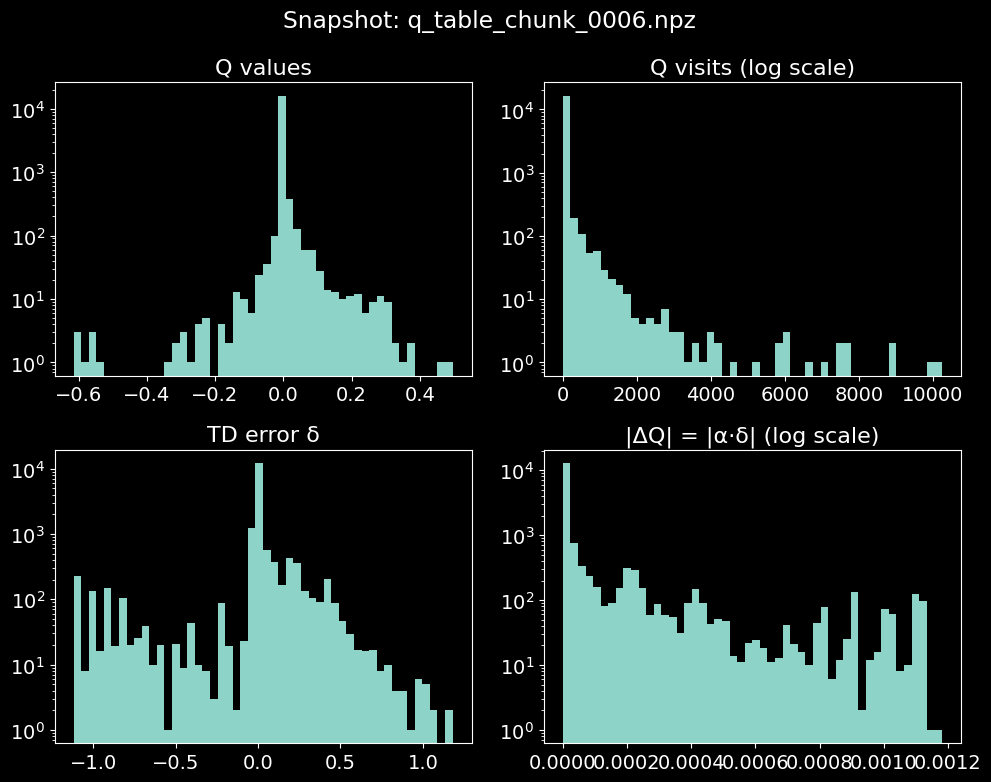

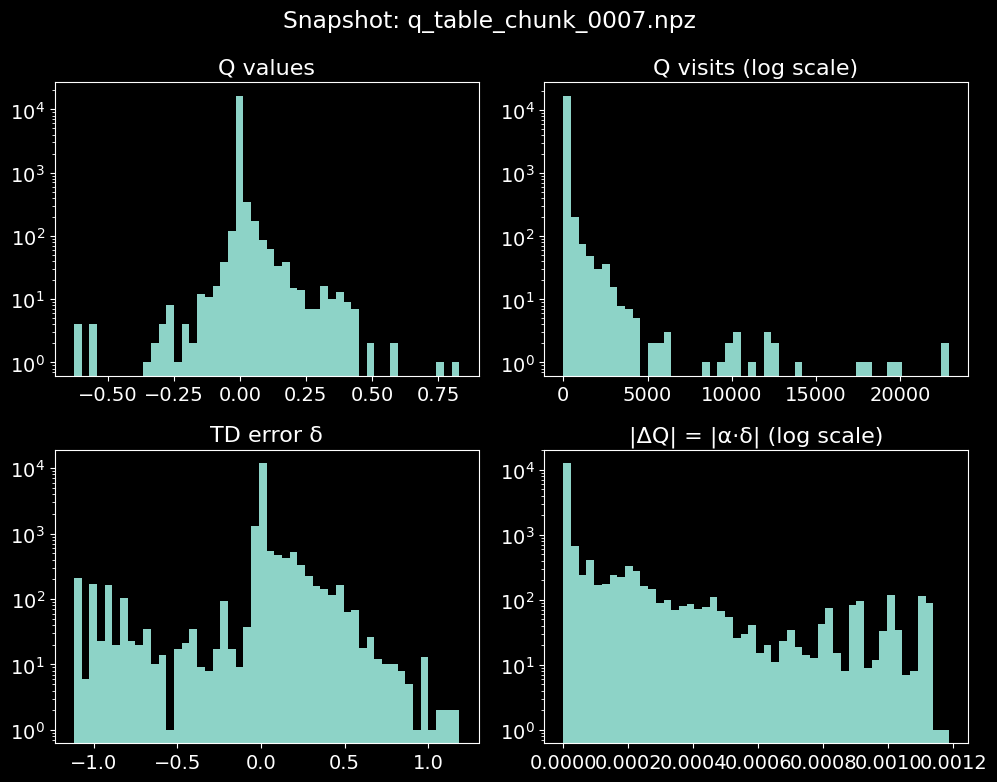

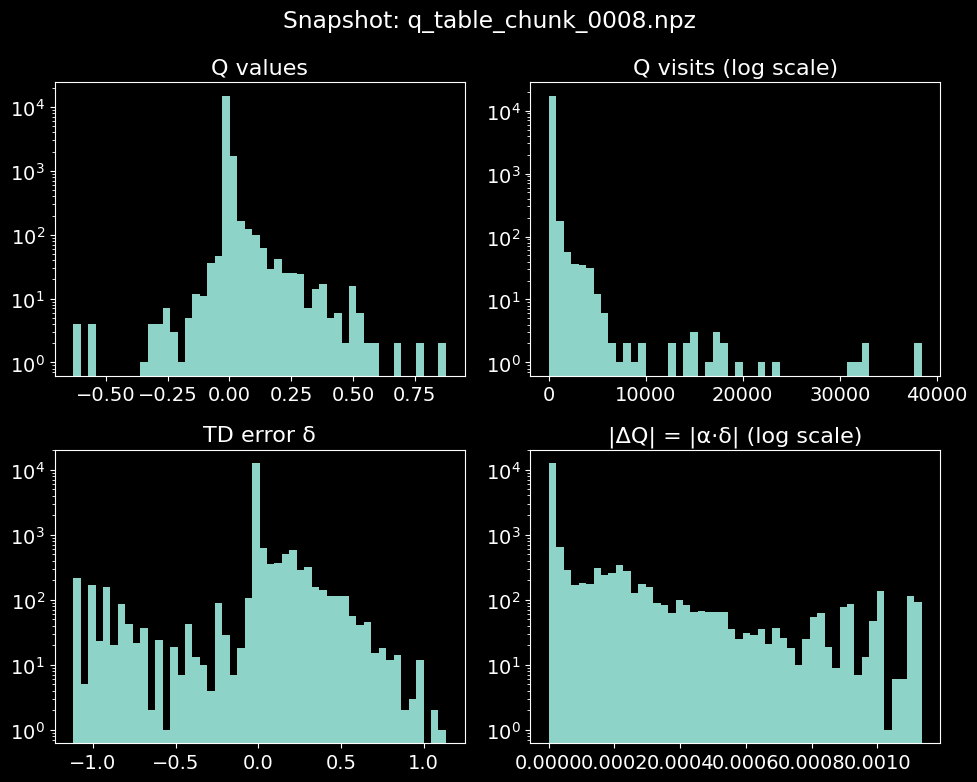

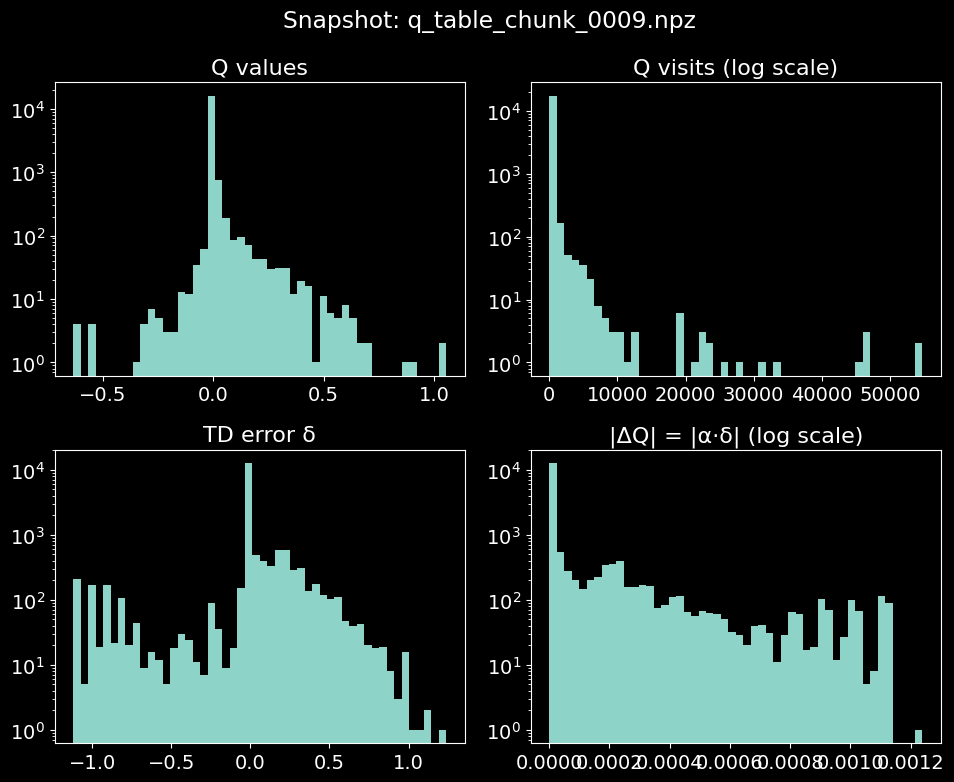

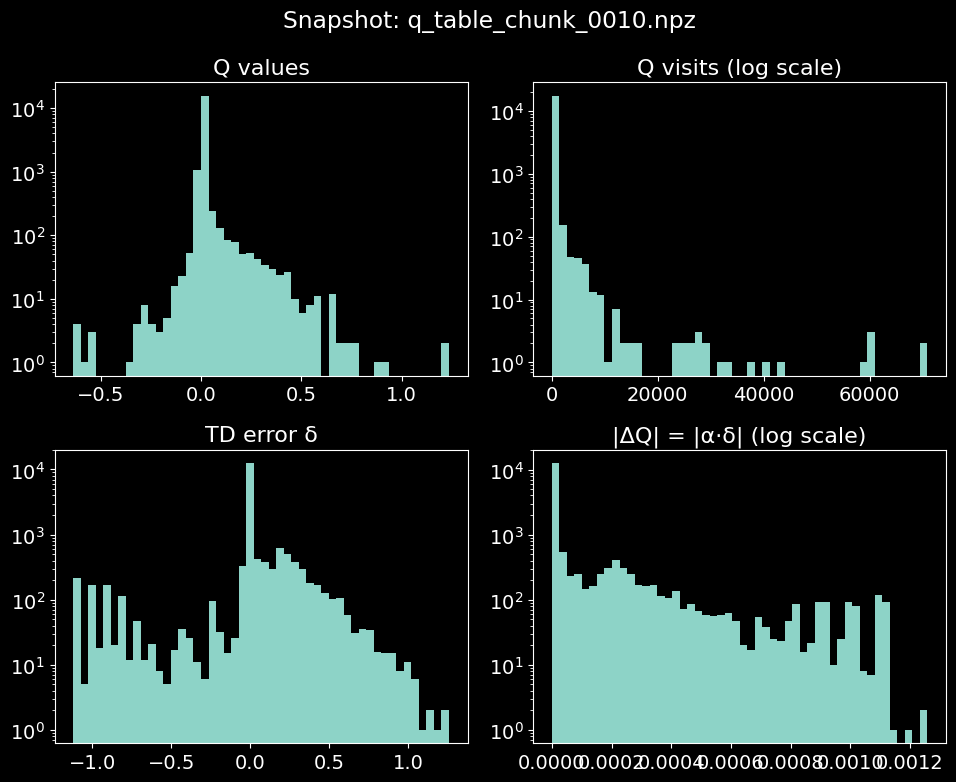

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_dict_histograms(folder):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".npz")])
    for f in files:
        path = os.path.join(folder, f)
        with np.load(path, allow_pickle=True) as data:
            q            = data["q"].item()
            q_visits     = data["q_visits"].item()
            q_td_error   = data["q_td_error"].item()
            q_update_mag = data["q_update_mag"].item()

        def flatten(d):
            return np.concatenate([np.ravel(v) for v in d.values()]) if d else np.array([])

        q_vals   = flatten(q)
        qv_vals  = flatten(q_visits)
        tde_vals = flatten(q_td_error)
        upm_vals = flatten(q_update_mag)

        fig, axs = plt.subplots(2, 2, figsize=(10,8))
        fig.suptitle(f"Snapshot: {f}")

        axs[0,0].hist(q_vals, bins=50, log=True)
        axs[0,0].set_title("Q values")

        axs[0,1].hist(qv_vals, bins=50, log=True)
        axs[0,1].set_title("Q visits (log scale)")

        axs[1,0].hist(tde_vals, bins=50, log=True)
        axs[1,0].set_title("TD error δ")

        axs[1,1].hist(upm_vals, bins=50, log=True)
        axs[1,1].set_title("|ΔQ| = |α·δ| (log scale)")

        plt.tight_layout()
        plt.show()

# Example usage:
plot_dict_histograms("agent_code/tq_cratehero/dicts")


t1

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_td_and_deltaq(folder):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".npz")])

    mean_abs_td   = []
    mean_update   = []
    snapshot_idx  = []

    def flatten(d):
        return np.concatenate([np.ravel(v) for v in d.values()]) if d else np.array([])

    for i, f in enumerate(files):
        path = os.path.join(folder, f)
        with np.load(path, allow_pickle=True) as data:
            td_dict = data["q_td_error"].item()      # dict[state] -> array
            dq_dict = data["q_update_mag"].item()    # dict[state] -> array (magnitudes)

        td_vals = flatten(td_dict)
        dq_vals = flatten(dq_dict)

        mean_abs_td.append(np.abs(td_vals).mean() if td_vals.size else np.nan)
        mean_update.append(dq_vals.mean()          if dq_vals.size else np.nan)
        snapshot_idx.append(i)

    plt.figure(figsize=(9,5))
    plt.plot(snapshot_idx, mean_abs_td,   marker="o", label="Mean |TD error|")
    plt.xlabel("Snapshot (sorted by filename)")
    plt.ylabel("Mean value")
    plt.title("Mean |TD error| and |ΔQ| over snapshots")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(9,5))
    plt.plot(snapshot_idx, mean_update,   marker="o", label="Mean |ΔQ|")
    plt.xlabel("Snapshot (sorted by filename)")
    plt.ylabel("Mean value")
    plt.title("Mean |TD error| and |ΔQ| over snapshots")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example:
plot_mean_td_and_deltaq("agent_code/tq_cratehero/dicts")
